<a href="https://colab.research.google.com/github/zuhaibai123/AUTO-ENCODER/blob/main/_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## **Loading the Dataset**

In [ ]:
# Loading the dataset without Target Variables
(x_train, _), (x_test, _) = mnist.load_data()

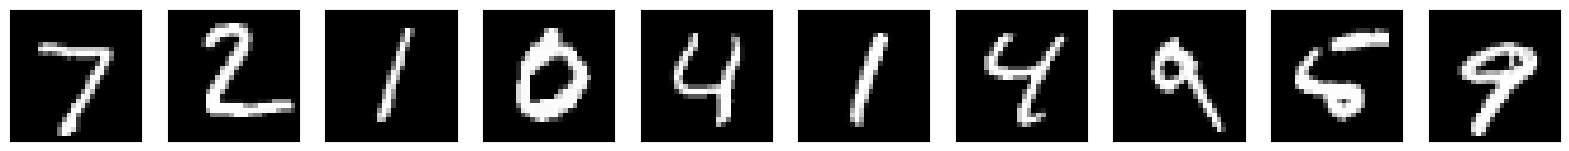

In [ ]:
# Display the Loaded dataset sample images


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 28*28*1))
x_test = x_test.reshape((len(x_test), 28*28*1))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


# **Auto Encoder using ANN**

### Preprocessing of Dataset

## **Developing Encoder, Decode and Autoencoder Models**

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
input_img = Input(shape=(784,))  #Input layer
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(28, activation='relu')(encoded)

encoded = Dense(20, activation='relu', name='bot')(encoded)

decoded = Dense(28, activation='relu', name='botnext0')(encoded)
decoded = Dense(64, activation='relu', name='botnext1')(decoded)
decoded = Dense(128, activation='relu', name = 'botnext2')(decoded)
decoded = Dense(784, activation='sigmoid', name="ae_out")(decoded)

Autoencoder = Model(inputs=input_img, outputs=decoded)
Autoencoder.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5), loss='binary_crossentropy')#, metrics = ["accuracy"])
Autoencoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 28)                1820      
                                                                 
 bot (Dense)                 (None, 20)                580       
                                                                 
 botnext0 (Dense)            (None, 28)                588       
                                                                 
 botnext1 (Dense)            (None, 64)                185

In [ ]:
#Encoder Model
encoder_vn = Model(inputs = input_img, outputs= Autoencoder.get_layer("bot").output )
encoder_vn.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 28)                1820      
                                                                 
 bot (Dense)                 (None, 20)                580       
                                                                 
Total params: 111,136
Trainable params: 111,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_input = Input(shape=(20,))
d_layer = Autoencoder.get_layer("botnext0")(encoded_input)
d_layer = Autoencoder.get_layer("botnext1")(d_layer)
d_layer = Autoencoder.get_layer("botnext2")(d_layer)
d_layer = Autoencoder.get_layer("ae_out")(d_layer)
decoder_vn = Model(inputs = encoded_input , outputs = d_layer)
decoder_vn.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 20)]              0         
                                                                 
 botnext0 (Dense)            (None, 28)                588       
                                                                 
 botnext1 (Dense)            (None, 64)                1856      
                                                                 
 botnext2 (Dense)            (None, 128)               8320      
                                                                 
 ae_out (Dense)              (None, 784)               101136    
                                                                 
Total params: 111,900
Trainable params: 111,900
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Autoencoder.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 28)                1820      
                                                                 
 bot (Dense)                 (None, 20)                580       
                                                                 
 botnext0 (Dense)            (None, 28)                588       
                                                                 
 botnext1 (Dense)            (None, 64)                1856

In [ ]:
from time import time
tic = time()
Autoencoder.fit(x_train, x_train,
                epochs=100,
                verbose=2,
                batch_size=1024,
                shuffle=True, validation_split = 0.1)
                #validation_data=(x_test, x_test))
toc = time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
53/53 - 0s - loss: 0.2494 - val_loss: 0.2493 - 435ms/epoch - 8ms/step
Epoch 2/100
53/53 - 0s - loss: 0.2494 - val_loss: 0.2492 - 365ms/epoch - 7ms/step
Epoch 3/100
53/53 - 0s - loss: 0.2494 - val_loss: 0.2493 - 389ms/epoch - 7ms/step
Epoch 4/100
53/53 - 0s - loss: 0.2493 - val_loss: 0.2492 - 382ms/epoch - 7ms/step
Epoch 5/100
53/53 - 0s - loss: 0.2493 - val_loss: 0.2492 - 361ms/epoch - 7ms/step
Epoch 6/100
53/53 - 0s - loss: 0.2493 - val_loss: 0.2492 - 369ms/epoch - 7ms/step
Epoch 7/100
53/53 - 0s - loss: 0.2493 - val_loss: 0.2491 - 422ms/epoch - 8ms/step
Epoch 8/100
53/53 - 1s - loss: 0.2493 - val_loss: 0.2492 - 512ms/epoch - 10ms/step
Epoch 9/100
53/53 - 0s - loss: 0.2493 - val_loss: 0.2491 - 497ms/epoch - 9ms/step
Epoch 10/100
53/53 - 1s - loss: 0.2493 - val_loss: 0.2491 - 527ms/epoch - 10ms/step
Epoch 11/100
53/53 - 0s - loss: 0.2493 - val_loss: 0.2491 - 494ms/epoch - 9ms/step
Epoch 12/100
53/53 - 0s - loss: 0.2492 - val_loss: 0.2491 - 394ms/epoch - 7ms/step
Epoch 13/10

313/313 [==============================] - 0s 1ms/step
Reduced Image Representation shape achieved Through Encoder Part: (10000, 20)
313/313 [==============================] - 0s 1ms/step
Recreated image Representation of Shape (10000, 784) using Decoder and reduced Image representation of shape (10000, 20)


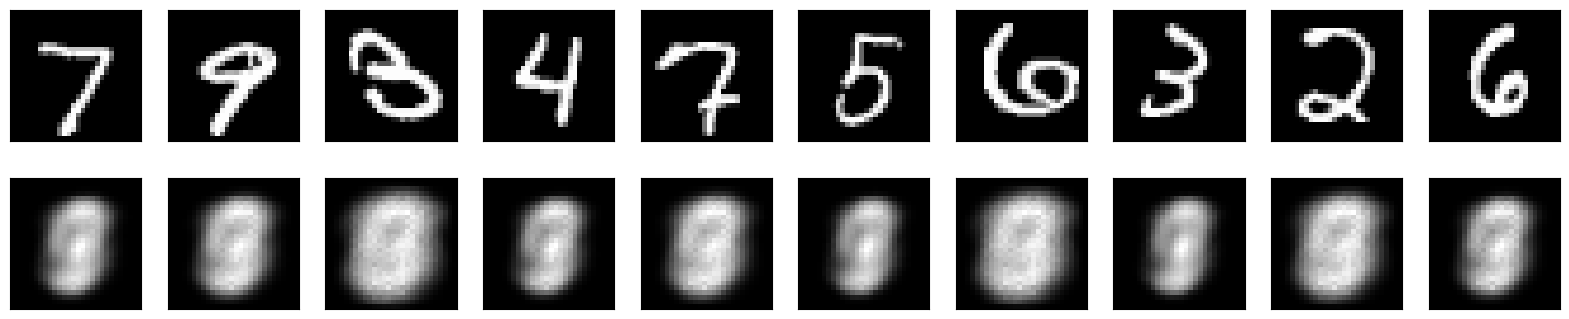

In [ ]:
#encoded_imgs = encoder_l.predict(x_test)
encoded_imgs = encoder_vn.predict(x_test)
print("Reduced Image Representation shape achieved Through Encoder Part: {}".format(encoded_imgs.shape))
#decoded_imgs = decoder_l.predict(encoded_imgs)
decoded_imgs = decoder_vn.predict(encoded_imgs)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (decoded_imgs.shape, encoded_imgs.shape))
n = 10  # how many digits we will display
k = 9 #multiplier
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Convolutional Autoencoder**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model

## **Architecture of Auto-encoder**

In [ ]:
input_layer_cnv = Input(shape = (28,28,1))
ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same", kernel_initializer="he_normal")(input_layer_cnv)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (4, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Flatten(name = "bot")(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape= (64,), name= "botnext0")(ae_cnv_en)
ae_cnv_de = Conv2D (4, (3,3), activation = "relu", padding = "same",name= "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2),name= "botnext2")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "same", name= "botnext3")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "valid",name= "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext6")(ae_cnv_de)

ae_cnv_de = Conv2D (1, (3,3), activation = "sigmoid", padding = "same",name = "botnext7")(ae_cnv_de)
Ae_Conv = Model(inputs = input_layer_cnv, outputs = ae_cnv_de)

Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5), loss='binary_crossentropy', metrics = ["accuracy"])
# Ae_Conv.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2), loss='binary_crossentropy', metrics = ["accuracy"])
Ae_Conv.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 4)           1156

## **Encoder**

In [ ]:
ae_conv_encoder = Model (inputs = input_layer_cnv, outputs = Ae_Conv.get_layer("bot").output, name = "Conv_AE_encoder")
ae_conv_encoder.summary()

Model: "Conv_AE_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 7, 7, 4)       

## **Decoder**

In [ ]:
# Traversing through the Layers of Decoder using Loop

encode_inp_cnv = Input(shape = (64,))
tmp_dec = Ae_Conv.get_layer("botnext0")(encode_inp_cnv)
for i in range(1,8):
  st = "botnext{}".format(i)
  tmp_dec = Ae_Conv.get_layer(st)(tmp_dec)

ae_conv_decoder = Model(inputs = encode_inp_cnv, outputs = tmp_dec, name= "Conv_AE_decoder")
ae_conv_decoder.summary()



Model: "Conv_AE_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 64)]              0         
                                                                 
 botnext0 (Reshape)          (None, 4, 4, 4)           0         
                                                                 
 botnext1 (Conv2D)           (None, 4, 4, 4)           148       
                                                                 
 botnext2 (UpSampling2D)     (None, 8, 8, 4)           0         
                                                                 
 botnext3 (Conv2D)           (None, 8, 8, 32)          1184      
                                                                 
 botnext4 (UpSampling2D)     (None, 16, 16, 32)        0         
                                                                 
 botnext5 (Conv2D)           (None, 14, 14, 32)    

## **Reshapping the Data**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## **Training the Auto Encoders**

In [ ]:
from time import time
tic = time()
Ae_Conv.fit(x_train, x_train,
                epochs=100,
                verbose=2,
                batch_size=1024,
                shuffle=False, validation_split = 0.1)
                #validation_data=(x_test, x_test))
toc = time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
53/53 - 4s - loss: 0.4303 - accuracy: 0.7923 - val_loss: 0.3141 - val_accuracy: 0.8088 - 4s/epoch - 71ms/step
Epoch 2/100
53/53 - 2s - loss: 0.2695 - accuracy: 0.8011 - val_loss: 0.2577 - val_accuracy: 0.7744 - 2s/epoch - 29ms/step
Epoch 3/100
53/53 - 2s - loss: 0.2346 - accuracy: 0.7895 - val_loss: 0.2278 - val_accuracy: 0.8025 - 2s/epoch - 29ms/step
Epoch 4/100
53/53 - 2s - loss: 0.2219 - accuracy: 0.7878 - val_loss: 0.2192 - val_accuracy: 0.7824 - 2s/epoch - 29ms/step
Epoch 5/100
53/53 - 2s - loss: 0.2148 - accuracy: 0.7874 - val_loss: 0.2131 - val_accuracy: 0.7999 - 2s/epoch - 30ms/step
Epoch 6/100
53/53 - 2s - loss: 0.2085 - accuracy: 0.7888 - val_loss: 0.2062 - val_accuracy: 0.7869 - 2s/epoch - 29ms/step
Epoch 7/100
53/53 - 2s - loss: 0.2048 - accuracy: 0.7898 - val_loss: 0.2045 - val_accuracy: 0.8013 - 2s/epoch - 31ms/step
Epoch 8/100
53/53 - 2s - loss: 0.2003 - accuracy: 0.7910 - val_loss: 0.2000 - val_accuracy: 0.7867 - 2s/epoch - 30ms/step
Epoch 9/100
53/53 - 2s -

## **Passing image to Encoder**

In [ ]:
encoded_imgs = ae_conv_encoder.predict(x_test)
#encoded_imgs = ae_conv_encoder.predict(x_train[0:100])
print (encoded_imgs.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 64)


## **Passing Compressed image Features to Decoder**

313/313 [==============================] - 1s 2ms/step
Recreated image Representation of Shape (10000, 28, 28, 1) using Decoder and reduced Image representation of shape (10000, 64)


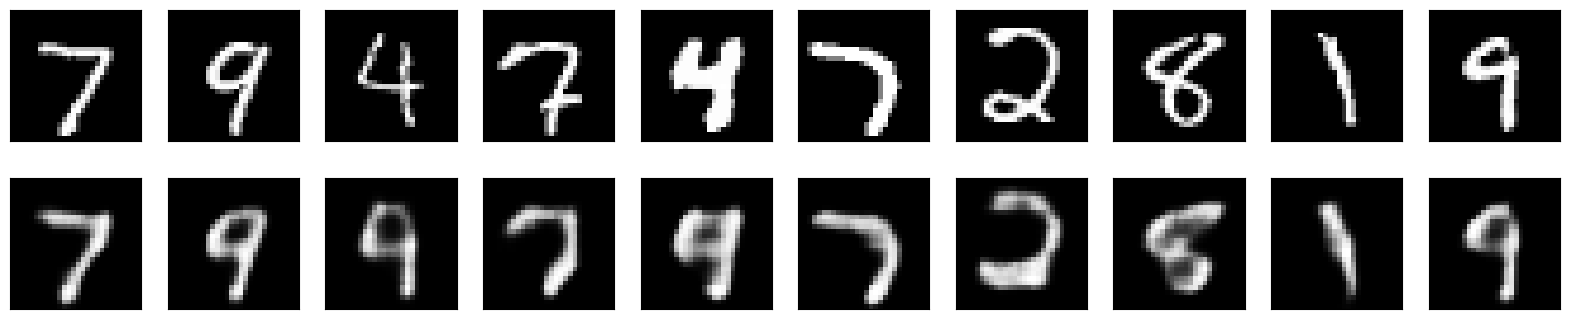

In [ ]:
#decoded_imgs = ae_conv_decoder.predict(encoded_imgs)
decoded_imgs = ae_conv_decoder.predict(encoded_imgs)

deoceded_images = Ae_Conv.predict(x_test)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (decoded_imgs.shape,
                                                                                                                      encoded_imgs.shape))
n = 10  # how many digits we will display
k= 12 # multiplier
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step
Recreated image Representation of Shape (10000, 28, 28, 1) using Decoder and reduced Image representation of shape (10000, 28, 28, 1)


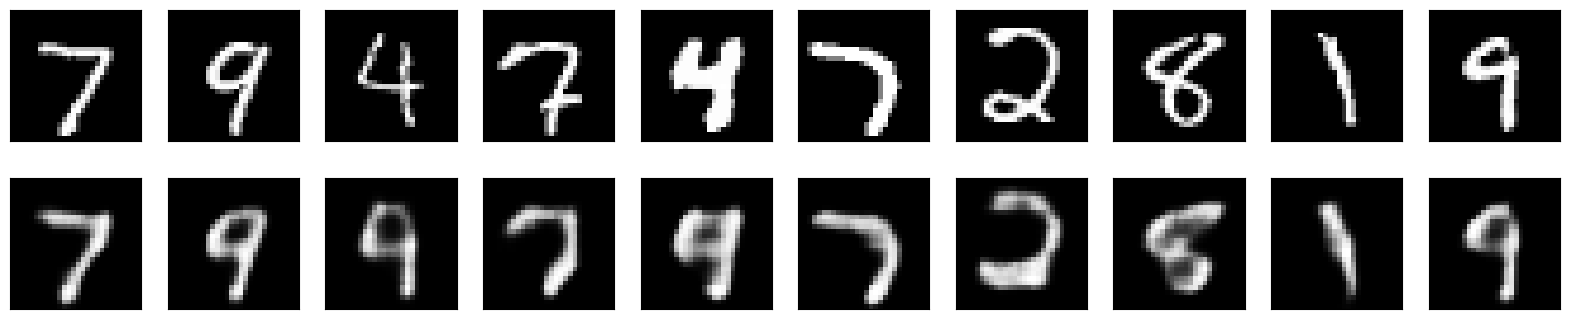

In [ ]:
deoceded_images = Ae_Conv.predict(x_test)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (deoceded_images.shape,
                                                                                                                      deoceded_images.shape))
n = 10  # how many digits we will display
k= 12 # multiplier
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(deoceded_images[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Denoising Autoencoder**

In [ ]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## **Adding Noise to the Data**

In [ ]:
# Create Noisy Data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape,x_test_noisy.shape )

(60000, 28, 28, 1) (10000, 28, 28, 1)


## **Displaying the Noisy Data**

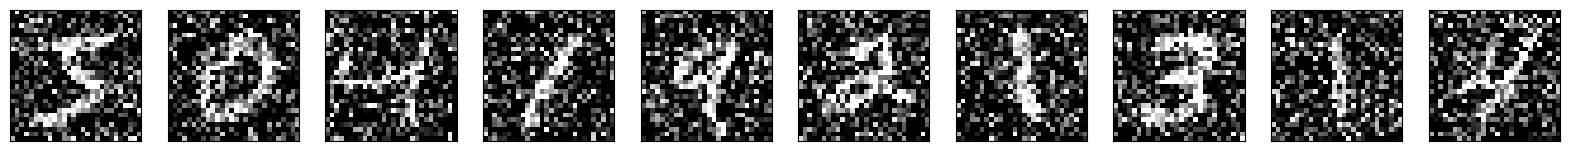

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

## **Architecture for Denoising Auto Encoder**

In [ ]:
input_layer_cnv = Input(shape = (28,28,1))
ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same", kernel_initializer="he_normal")(input_layer_cnv)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (32, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Conv2D (4, (3,3), activation = "relu", padding = "same")(ae_cnv_en)
ae_cnv_en = MaxPooling2D ((2,2), padding="same")(ae_cnv_en)

ae_cnv_en = Flatten(name = "bot")(ae_cnv_en)

ae_cnv_de = Reshape((4,4,4), input_shape= (64,), name= "botnext0")(ae_cnv_en)

ae_cnv_de = Conv2D (4, (3,3), activation = "relu", padding = "same",name= "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2),name= "botnext2")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "same", name= "botnext3")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D (32, (3,3), activation = "relu", padding = "valid",name= "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D ((2,2), name= "botnext6")(ae_cnv_de)

ae_cnv_de = Conv2D (1, (3,3), activation = "sigmoid", padding = "same",name = "botnext7")(ae_cnv_de)
Ae_Conv_denoise = Model (inputs = input_layer_cnv, outputs = ae_cnv_de)

#Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09,clipvalue=2.5), loss='binary_crossentropy', metrics = ["accuracy"])

Ae_Conv_denoise.compile(optimizer=tf.keras.optimizers.Adadelta(0.1,clipvalue=2), loss='binary_crossentropy', metrics = ["accuracy"])
Ae_Conv_denoise.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 7, 7, 4)           1156

## **Encoder**

In [ ]:
ae_conv_dns_encoder = Model (inputs = input_layer_cnv,outputs = Ae_Conv_denoise.get_layer("bot").output, name = "Conv_AE_dns_encoder")
ae_conv_dns_encoder.summary()

## **Decoder**

In [ ]:
encode_inp_cnv = Input(shape = (64,))
tmp_dec = Ae_Conv_denoise.get_layer("botnext0")(encode_inp_cnv)
for i in range(1,8):
  st = "botnext{}".format(i)
  tmp_dec = Ae_Conv_denoise.get_layer(st)(tmp_dec)

ae_conv_dns_decoder = Model(inputs = encode_inp_cnv,outputs = tmp_dec, name= "Conv_AE_dns_decoder")
ae_conv_dns_decoder.summary()

Model: "Conv_AE_dns_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 64)]              0         
                                                                 
 botnext0 (Reshape)          (None, 4, 4, 4)           0         
                                                                 
 botnext1 (Conv2D)           (None, 4, 4, 4)           148       
                                                                 
 botnext2 (UpSampling2D)     (None, 8, 8, 4)           0         
                                                                 
 botnext3 (Conv2D)           (None, 8, 8, 32)          1184      
                                                                 
 botnext4 (UpSampling2D)     (None, 16, 16, 32)        0         
                                                                 
 botnext5 (Conv2D)           (None, 14, 14, 32)

## **Training the Denoising Auto Encoder**

In [ ]:
from time import time
tic = time()
Ae_Conv_denoise.fit(x_train_noisy, x_train,
                epochs=100,
                verbose=2,
                batch_size=256,
                shuffle=False, validation_split = 0.1)
                #validation_data=(x_test, x_test))
toc = time()
print("Training Took {} Secs".format(toc-tic))

Epoch 1/100
211/211 - 4s - loss: 0.3540 - accuracy: 0.7934 - val_loss: 0.2672 - val_accuracy: 0.8007 - 4s/epoch - 21ms/step
Epoch 2/100
211/211 - 2s - loss: 0.2641 - accuracy: 0.7987 - val_loss: 0.2593 - val_accuracy: 0.8054 - 2s/epoch - 9ms/step
Epoch 3/100
211/211 - 2s - loss: 0.2567 - accuracy: 0.8003 - val_loss: 0.2535 - val_accuracy: 0.8053 - 2s/epoch - 10ms/step
Epoch 4/100
211/211 - 2s - loss: 0.2504 - accuracy: 0.8002 - val_loss: 0.2474 - val_accuracy: 0.8046 - 2s/epoch - 9ms/step
Epoch 5/100
211/211 - 2s - loss: 0.2440 - accuracy: 0.7985 - val_loss: 0.2415 - val_accuracy: 0.8028 - 2s/epoch - 9ms/step
Epoch 6/100
211/211 - 2s - loss: 0.2384 - accuracy: 0.7964 - val_loss: 0.2362 - val_accuracy: 0.8012 - 2s/epoch - 9ms/step
Epoch 7/100
211/211 - 2s - loss: 0.2330 - accuracy: 0.7947 - val_loss: 0.2305 - val_accuracy: 0.7996 - 2s/epoch - 9ms/step
Epoch 8/100
211/211 - 2s - loss: 0.2267 - accuracy: 0.7935 - val_loss: 0.2238 - val_accuracy: 0.7987 - 2s/epoch - 9ms/step
Epoch 9/100
21

## **Passing images to Encoder**

In [ ]:
dns_encoded_imgs = ae_conv_dns_encoder.predict(x_test_noisy)
#encoded_imgs = ae_conv_encoder.predict(x_train[0:100])
print (dns_encoded_imgs.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 64)


## **Passing Compressed image Features to Deccoder**

313/313 [==============================] - 1s 2ms/step
Recreated image Representation of Shape (10000, 28, 28, 1) using Decoder and reduced Image representation of shape (10000, 64)


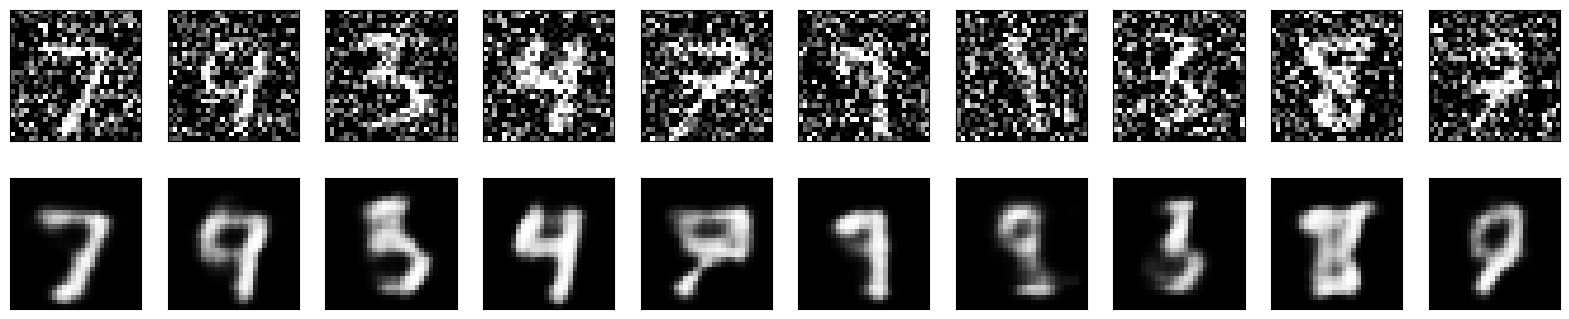

In [ ]:
#decoded_imgs = ae_conv_decoder.predict(encoded_imgs)
dns_decoded_imgs = ae_conv_dns_decoder.predict(dns_encoded_imgs)
# dns_decoded_image = Ae_Conv_denoise.predict(x_test_noisy)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (dns_decoded_imgs.shape,
                                                                                                                      dns_encoded_imgs.shape))
n = 10  # how many digits we will display
k =16
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(dns_decoded_imgs[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 1s 2ms/step
Recreated image Representation of Shape (10000, 28, 28, 1) using Decoder and reduced Image representation of shape (10000, 28, 28, 1)


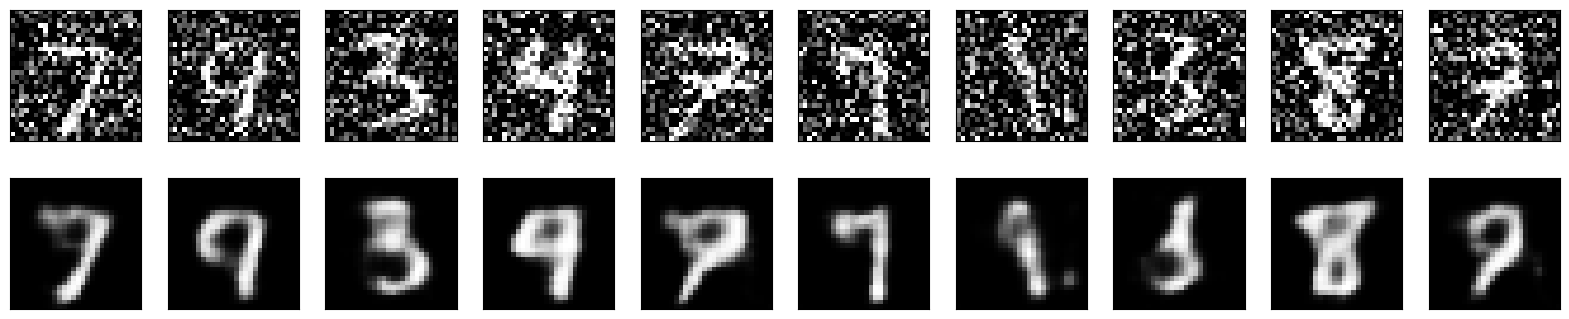

In [ ]:
dns_decoded_image = Ae_Conv_denoise.predict(x_test_noisy)
print("Recreated image Representation of Shape {} using Decoder and reduced Image representation of shape {}".format (dns_decoded_image.shape,
                                                                                                                      dns_decoded_image.shape))
n = 10  # how many digits we will display
k =16
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(dns_decoded_image[i*k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()